# Modelo de Regresión Lineal, usando datos simulados

* y = a + b * x

* X :  100 valores distribuidos según una N(mu = 1.5, sd = 2)

* Y = 5 + 1.9 * x + e

* e :  valores distribuidos según una N(0, 0.75)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2 * np.random.randn(100)

(array([ 4.,  5., 10., 19., 22., 16., 10.,  9.,  3.,  2.]),
 array([-2.99566451e+00, -1.99789296e+00, -1.00012141e+00, -2.34986465e-03,
         9.95421683e-01,  1.99319323e+00,  2.99096478e+00,  3.98873633e+00,
         4.98650787e+00,  5.98427942e+00,  6.98205097e+00]),
 <a list of 10 Patch objects>)

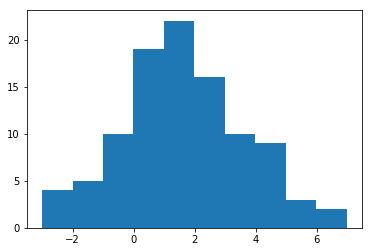

In [3]:
plt.hist(x)

In [4]:
res = 0 + 0.9*np.random.randn(100)

(array([ 1.,  3.,  6.,  7., 19., 22., 17., 13.,  7.,  5.]),
 array([-2.34181761, -1.92498912, -1.50816064, -1.09133216, -0.67450367,
        -0.25767519,  0.1591533 ,  0.57598178,  0.99281027,  1.40963875,
         1.82646724]),
 <a list of 10 Patch objects>)

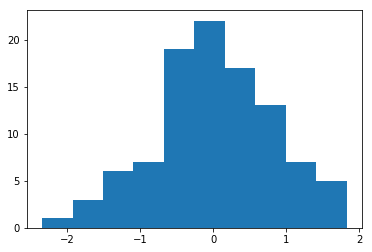

In [5]:
plt.hist(res)

In [6]:
y_pred = 4 + 2 * x

In [7]:
y_actual = 4 + 2 * x + res

In [8]:
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_actual.tolist()

In [9]:
data=pd.DataFrame({"x":x_list, "y_actual":y_act_list, "y_pred":y_pred_list})
data.head()

,x,y_actual,y_pred
0,0.457490,5.236239,4.914981
1,4.718061,14.040955,13.436121
2,3.154786,10.236047,10.309572
3,4.969522,15.559993,13.939044
4,3.461678,10.217150,10.923356


Text(0.5, 1.0, 'Valor actual vs Predicción')

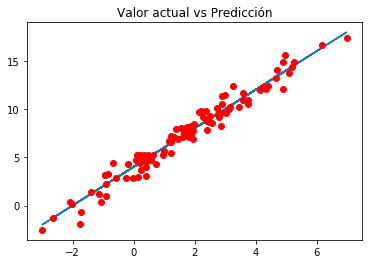

In [10]:
plt.plot(x,y_pred)
plt.plot(x,y_actual,"ro")
plt.title("Valor actual vs Predicción")

In [11]:
y_media = [np.mean(y_actual) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

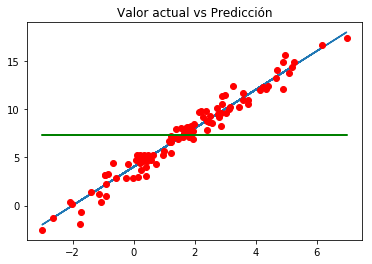

In [12]:
plt.plot(x, y_pred)
plt.plot(x, y_actual,"ro")
plt.plot(x, y_media,"g")
plt.title("Valor actual vs Predicción")

**En un mundo ideal:**

\begin{align*}
SST=SSR+SSD
\end{align*}


La suma de los cuadrados totales es igual a la suma de los cuadrados de la refresión mas la suma de los cuadrados de la diferencia.

\begin{align*}
SSR=(y_r-\bar{y})^2
\end{align*}

\begin{align*}
SSD=(y_i-y_r)^2
\end{align*}

\begin{align*}
SST=(y_i-\bar{y})^2
\end{align*}

In [13]:
data["SSR"]= (data.y_pred-y_media)**2
data["SSD"]= (data.y_pred-data.y_actual)**2
data["SST"]= (data.y_actual-y_media)**2

In [14]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,0.457490,5.236239,4.914981,5.727902,0.103207,4.293371
1,4.718061,14.040955,13.436121,37.550388,0.365823,45.328853
2,3.154786,10.236047,10.309572,9.007726,0.005406,8.571797
3,4.969522,15.559993,13.939044,43.966976,2.627475,68.090696
4,3.461678,10.217150,10.923356,13.068745,0.498726,8.461503


In [15]:
SSR=sum(data.SSR)
SSD=sum(data.SSD)
SST=sum(data.SST)
print(SSR)
print(SSD)
print(SST)

1639.1878487810732
67.17582202175483
1758.2916800877767


In [16]:
SSR+SSD

1706.363670802828

Calculemos el coeficiente de correlación mediante la siguiente fórmula:
\begin{align*}
R^2=\frac{SSR}{SST}
\end{align*}

In [17]:
R2=SSR/SST
print(R2)

0.9322616192435389


## Obteniendo la recta de regresión

 La recta de regresión lineal simple tiene la siguiente forma:
 
 \begin{align*}
 y=a+bx
 \end{align*}
 
 donde a es la ordenada al origen y b la pendiente
 
 Los parámetros de la regresión simple se calculan mediante:
 
\begin{align*}
b=\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2}
\end{align*}

\begin{align*}
a=\bar{y}-b\bar{x}
\end{align*}

In [18]:
x_mean=np.mean(data.x)
y_mean=np.mean(data.y_actual)
x_mean,y_mean

(1.6535417773165006, 7.308284163331102)

In [19]:
data["b_numerador"]=(data.x-x_mean)*(data.y_actual-y_mean)
data["b_denominador"]=(data.x-x_mean)**2

In [20]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,b_numerador,b_denominador
0,0.457490,5.236239,4.914981,5.727902,0.103207,4.293371,2.478273,1.430539
1,4.718061,14.040955,13.436121,37.550388,0.365823,45.328853,20.632396,9.391276
2,3.154786,10.236047,10.309572,9.007726,0.005406,8.571797,4.395287,2.253734
3,4.969522,15.559993,13.939044,43.966976,2.627475,68.090696,27.362503,10.995725
4,3.461678,10.217150,10.923356,13.068745,0.498726,8.461503,5.259626,3.269357


In [21]:
b=sum(data.b_numerador)/sum(data.b_denominador)

In [22]:
a=y_mean-b*x_mean

In [23]:
a,b

(3.948817584334248, 2.03167928689946)

\begin{align*}
y_{modelo}=4.0462+0.86379x
\end{align*}

El modelo de regresión ya contiene el parametro dado por el error con el que se había iniciado el problema. Al ya estar ajustado es posible pensar que se puede obtener una mejor predicción del ejemplo:

In [24]:
data["y_modelo"]=a+b*data.x
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,b_numerador,b_denominador,y_modelo
0,0.457490,5.236239,4.914981,5.727902,0.103207,4.293371,2.478273,1.430539,4.878291
1,4.718061,14.040955,13.436121,37.550388,0.365823,45.328853,20.632396,9.391276,13.534404
2,3.154786,10.236047,10.309572,9.007726,0.005406,8.571797,4.395287,2.253734,10.358331
3,4.969522,15.559993,13.939044,43.966976,2.627475,68.090696,27.362503,10.995725,14.045292
4,3.461678,10.217150,10.923356,13.068745,0.498726,8.461503,5.259626,3.269357,10.981837


In [25]:
SSR_2= sum((data.y_modelo-y_mean)**2)
SSD_2= sum((data.y_modelo-data.y_actual)**2)
SST_2= sum((data.y_actual-y_mean)**2)

In [26]:
print(SSR_2)
print(SSD_2)
print(SST_2)

1691.5272650714348
66.76441501634312
1758.291680087776


In [27]:
SSR_2+SSD_2

1758.2916800877779

In [28]:
R2_2=SSR_2/SST_2
print(R2_2)

0.9620288170771483


Text(0.5, 1.0, 'Valor actual vs Predicción')

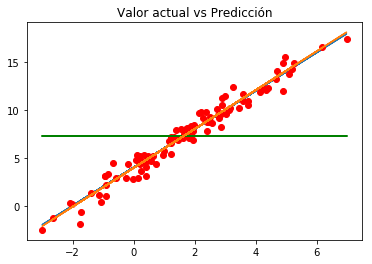

In [29]:
plt.plot(data.x, data.y_pred)
plt.plot(data.x, data.y_actual,"ro")
plt.plot(data.x, y_media,"g")
plt.plot(data.x, data.y_modelo)
plt.title("Valor actual vs Predicción")

## P value

**Supocisión:**
El modelo presenta una relación lineal entre X y Y:

\begin{align*}
y_{estimada}=a+bx
\end{align*}

Para determinar si dicha relación es real, se plantea la siguiente hipótesis:

\begin{align*}
H_{0}:b=0
\end{align*}

\begin{align*}
H_{1}:b\not=0
\end{align*}


Si el p value resultante es mayor que el nivel de significancia ($\alpha$) de la prueba de hipótesis, podemos asegurar que b es igual a cero. Con ello el valor en la ecuación nos daría que Y es identicamente igual al valor de a, y por lo tanto X y Y no están relacionados. Por otra parte, si el p value es  menor que el nivel de significancia, podemos rechazar la hipótesis nula y aceptar que existe una relación lineal entre X y Y

## Error estandar de los residuos (RSE)

\begin{align*}
RSE=\sqrt{\frac{SSD}{n-k-1}}
\end{align*}

Donde $n$ representa el número de filas en el DataFrame, $k$ el número de variables predictoras.

In [30]:
RSE=np.sqrt(SSD/(len(data)-2))
RSE

0.8279296900405007

In [31]:
np.mean(data.y_actual)

7.308284163331102

In [32]:
error_prom=RSE/np.mean(data.y_actual)
error_prom

0.11328646663666836

## Regresión Lineal en Python

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv("Datasets\Advertising.csv")

In [35]:
df[:5]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [36]:
import statsmodels.formula.api as smf

In [37]:
# Creamos el modelo de predicción lineal
# La tilde se obtiene con alt+126
lm=smf.ols(formula="Sales~TV", data=df).fit()

In [38]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería:

\begin{align*}
Sales=7.0326+0.0475(T.V.)
\end{align*}


In [39]:
7.032594+0.047537*45

9.171759

In [40]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Como los parámetros estadísticos son menores a 0.05, podemos asegurar que los valores obtenidos son correctos.

In [41]:
lm.rsquared

0.611875050850071

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.47e-42
Time:                        18:46:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
sales_pred=lm.predict(df.TV)

In [44]:
sales_pred[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

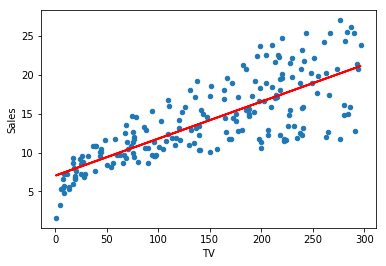

In [45]:
df.plot("TV","Sales",kind="scatter")
plt.plot(pd.DataFrame(df.TV),sales_pred,c="red",linewidth=2)
plt.show()

In [46]:
df["sales_pred"]=sales_pred

In [47]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,sales_pred
0,1,230.1,37.8,69.2,22.1,17.970775
1,2,44.5,39.3,45.1,10.4,9.147974
2,3,17.2,45.9,69.3,9.3,7.850224
3,4,151.5,41.3,58.5,18.5,14.234395
4,5,180.8,10.8,58.4,12.9,15.627218


In [48]:
df["RSE"]=(df.Sales-df.sales_pred)**2

In [49]:
SSD=sum(df.RSE)
SSD

2102.5305831313503

In [50]:
RSE=np.sqrt(SSD/(len(df)-2))
RSE

3.258656368650462

In [52]:
sales_mean=np.mean(df.Sales)
sales_mean

14.022500000000003

In [53]:
error=RSE/sales_mean
error

0.23238768897489473

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

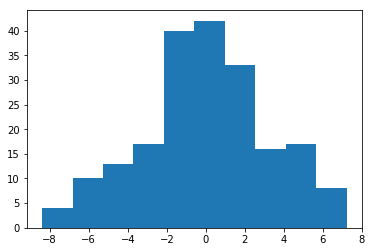

In [55]:
plt.hist((df.Sales-df.sales_pred))